In [2]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import pandas as pd

os.chdir(os.path.expanduser("~"))
# Had trouble getting the working directory - this fixed it
os.chdir(os.path.join(os.getcwd(), "BE"))
 
print(os.getcwd())

# Read the CSV file into a pandas dataframe
exp1 = pd.read_csv('experiment.csv')
exp2 = pd.read_csv('updateddata.csv')

/home/justinzhou/BE


In [3]:
exp1.info()  # Check for missing values and variable types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration          105 non-null    int64  
 1   control_leader    52 non-null     float64
 2   control_follower  52 non-null     float64
 3   title_leader      53 non-null     float64
 4   title_follower    53 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 4.2 KB


In [4]:
exp2.info()  # Check for missing values and variable types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   duration           100 non-null    int64  
 1   morework_leader    50 non-null     float64
 2   morework_follower  50 non-null     float64
 3   lesswork_leader    50 non-null     float64
 4   lesswork_follower  50 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [5]:
#exp1

# Split based on NaN values in the first two columns
treatmentdf = exp1[exp1['control_leader'].isna() & exp1['control_follower'].isna()]
treatmentdf = treatmentdf.dropna(axis=1)

# Rename columns
treatmentdf = treatmentdf.rename(columns={'title_leader': 'leader', 'title_follower': 'follower'})



# Split based on NaN values in the last two columns
controldf = exp1[exp1['title_leader'].isna() & exp1['title_follower'].isna()]
controldf = controldf.dropna(axis=1)

# Rename columns
controldf = controldf.rename(columns={'control_leader': 'leader', 'control_follower': 'follower'})


In [6]:
#exp2

# Split based on NaN values in the first two columns
lessworkdf = exp2[exp2['morework_leader'].isna() & exp2['morework_follower'].isna()]
lessworkdf = lessworkdf.dropna(axis=1)


# Rename columns
lessworkdf = lessworkdf.rename(columns={'lesswork_leader': 'leader', 'lesswork_follower': 'follower'})

# Split based on NaN values in the last two columns
moreworkdf = exp2[exp2['lesswork_leader'].isna() & exp2['lesswork_follower'].isna()]
moreworkdf = moreworkdf.dropna(axis=1)

# Rename columns
moreworkdf = moreworkdf.rename(columns={'morework_leader': 'leader', 'morework_follower': 'follower'})


In [7]:
#compare control means vs. adding the "leader/follower" title (LEADER)

leader_treatment = treatmentdf["leader"]
leader_control = controldf["leader"]
t_statistic, p_value = stats.ttest_ind(leader_treatment, leader_control)
print(p_value)

0.8965947363441791


In [8]:
#compare control means vs. adding the "leader/follower" title (FOLLOWER)

follower_treatment = treatmentdf["follower"]
follower_control = controldf["follower"]
t_statistic, p_value = stats.ttest_ind(follower_treatment, follower_control)
print(p_value)

0.5960022867296004


In [9]:
#compare the "leader/follower" title vs. the "leader/follower" title with more work (LEADER)

leader_treatment = treatmentdf["leader"]
leader_morework = moreworkdf["leader"]
t_statistic, p_value = stats.ttest_ind(leader_treatment, leader_morework)
print(p_value)

0.0405169960401369


In [10]:
#compare the "leader/follower" title vs. the "leader/follower" title with more work (FOLLOWER)
follower_treatment = treatmentdf["follower"]
follower_morework = moreworkdf["follower"]
t_statistic, p_value = stats.ttest_ind(follower_treatment, follower_morework)
print(p_value)

0.00012796705095488158


In [11]:
#compare the "leader/follower" title vs. the "leader/follower" title with less work (LEADER)
leader_treatment = treatmentdf["leader"]
leader_lesswork = lessworkdf["leader"]
t_statistic, p_value = stats.ttest_ind(leader_treatment, leader_lesswork)
print(p_value)

1.8821995966492164e-06


In [12]:
#compare the "leader/follower" title vs. the "leader/follower" title with less work (FOLLOWER)
follower_treatment = treatmentdf["follower"]
follower_lesswork = lessworkdf["follower"]

t_statistic, p_value = stats.ttest_ind(follower_treatment, follower_lesswork)

print(p_value)

0.35427642458911524


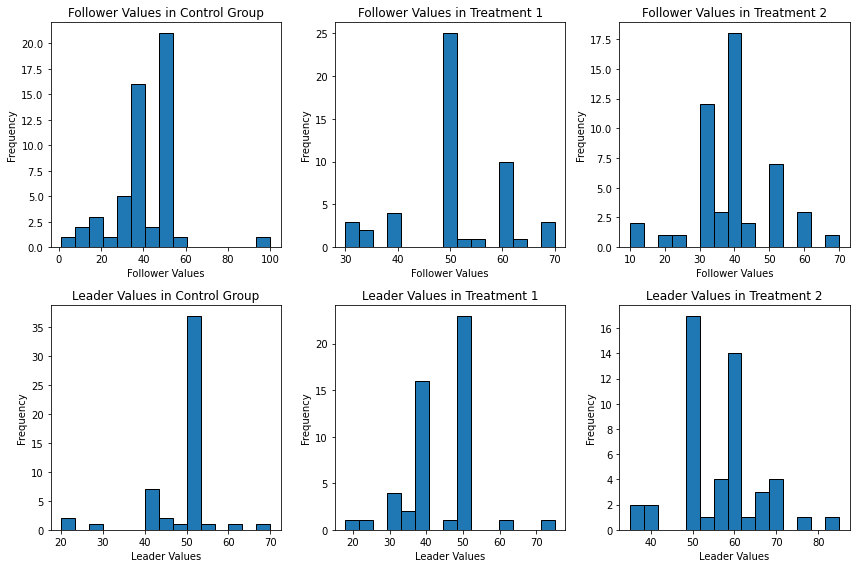

In [13]:
import matplotlib.pyplot as plt

# Create a two by three grid of subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

# Histogram for follower values in treatmentdf
axs[0, 0].hist(treatmentdf['follower'], bins=15, edgecolor='black')
axs[0, 0].set_xlabel('Follower Values')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Follower Values in Control Group')

# Histogram for follower values in moreworkdf
axs[0, 1].hist(moreworkdf['follower'], bins=15, edgecolor='black')
axs[0, 1].set_xlabel('Follower Values')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Follower Values in Treatment 1')

# Histogram for follower values in lessworkdf
axs[0, 2].hist(lessworkdf['follower'], bins=15, edgecolor='black')
axs[0, 2].set_xlabel('Follower Values')
axs[0, 2].set_ylabel('Frequency')
axs[0, 2].set_title('Follower Values in Treatment 2')

# Histogram for leader values in treatmentdf
axs[1, 0].hist(treatmentdf['leader'], bins=15, edgecolor='black')
axs[1, 0].set_xlabel('Leader Values')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Leader Values in Control Group')

# Histogram for leader values in moreworkdf
axs[1, 1].hist(moreworkdf['leader'], bins=15, edgecolor='black')
axs[1, 1].set_xlabel('Leader Values')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Leader Values in Treatment 1')

# Histogram for leader values in lessworkdf
axs[1, 2].hist(lessworkdf['leader'], bins=15, edgecolor='black')
axs[1, 2].set_xlabel('Leader Values')
axs[1, 2].set_ylabel('Frequency')
axs[1, 2].set_title('Leader Values in Treatment 2')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


In [14]:
# Calculate the means of follower responses for each group
treatmentdf_follower_mean = treatmentdf['follower'].mean()
moreworkdf_follower_mean = moreworkdf['follower'].mean()
lessworkdf_follower_mean = lessworkdf['follower'].mean()
controldf_follower_mean = controldf['follower'].mean()

# Calculate the means of leader responses for each group
treatmentdf_leader_mean = treatmentdf['leader'].mean()
moreworkdf_leader_mean = moreworkdf['leader'].mean()
lessworkdf_leader_mean = lessworkdf['leader'].mean()
controldf_leader_mean = controldf['leader'].mean()

# Print the means of follower responses for each group
print("Mean of Follower Responses:")
print("Control Group:", treatmentdf_follower_mean)
print("Treatment 1 Group:", moreworkdf_follower_mean)
print("Treatment 2 Group:", lessworkdf_follower_mean)
print()

# Print the means of leader responses for each group
print("Mean of Leader Responses:")
print("Control Group:", treatmentdf_leader_mean)
print("Treatment 1 Group:", moreworkdf_leader_mean)
print("Treatment 2 Group:", lessworkdf_leader_mean)




Mean of Follower Responses:
Control Group: 41.16981132075472
Treatment 1 Group: 50.98
Treatment 2 Group: 38.74

Mean of Leader Responses:
Control Group: 47.64150943396226
Treatment 1 Group: 44.1
Treatment 2 Group: 56.36


In [15]:
# Calculate the means of follower responses for each group
treatmentdf_follower_mean = treatmentdf['follower'].mean()
moreworkdf_follower_mean = moreworkdf['follower'].mean()
lessworkdf_follower_mean = lessworkdf['follower'].mean()
controldf_follower_mean = controldf['follower'].mean()

# Calculate the means of leader responses for each group
treatmentdf_leader_mean = treatmentdf['leader'].mean()
moreworkdf_leader_mean = moreworkdf['leader'].mean()
lessworkdf_leader_mean = lessworkdf['leader'].mean()
controldf_leader_mean = controldf['leader'].mean()

# Create a dictionary with the mean values for each group
data = {
    'Group': ['Control Group', 'Treatment 1 Group', 'Treatment 2 Group'],
    'Mean Follower Responses': [treatmentdf_follower_mean, moreworkdf_follower_mean, lessworkdf_follower_mean],
    'Mean Leader Responses': [treatmentdf_leader_mean, moreworkdf_leader_mean, lessworkdf_leader_mean]
}

# Create a pandas DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the 'Group' column as the index
df.set_index('Group', inplace=True)

# Display the DataFrame
print(df)


                   Mean Follower Responses  Mean Leader Responses
Group                                                            
Control Group                    41.169811              47.641509
Treatment 1 Group                50.980000              44.100000
Treatment 2 Group                38.740000              56.360000


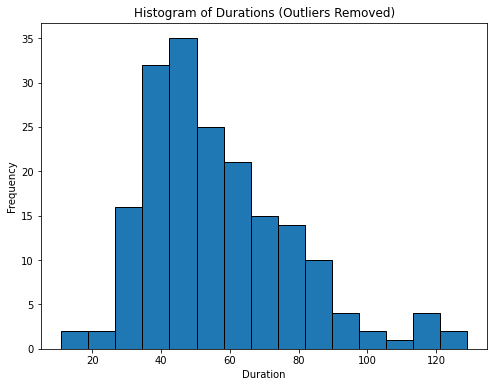

Average Duration (Outliers Removed): 56.832432432432434


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Concatenate the durations from both dataframes
all_durations = np.concatenate([exp1['duration'], exp2['duration']])

# Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(all_durations, 25)
Q3 = np.percentile(all_durations, 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the durations
filtered_durations = all_durations[(all_durations >= lower_bound) & (all_durations <= upper_bound)]

# Calculate the average duration after removing outliers
average_duration = np.mean(filtered_durations)

# Plot the histogram of filtered durations
plt.figure(figsize=(8, 6))
plt.hist(filtered_durations, bins=15, edgecolor='black')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Durations (Outliers Removed)')
plt.show()

# Print the average duration after removing outliers
print("Average Duration (Outliers Removed):", average_duration)


In [18]:
treatmentdf.describe()

,duration,leader,follower
count,53.000000,53.000000,53.000000
mean,74.415094,47.641509,41.169811
std,76.728902,7.808019,14.770990
min,29.000000,20.000000,1.000000
25%,42.000000,50.000000,40.000000
50%,52.000000,50.000000,40.000000
75%,67.000000,50.000000,50.000000
max,519.000000,70.000000,100.000000


In [19]:
controldf.describe()

,duration,leader,follower
count,52.000000,52.000000,52.000000
mean,65.711538,47.346154,42.884615
std,44.990342,14.500689,18.129873
min,11.000000,0.000000,5.000000
25%,39.750000,50.000000,36.750000
50%,53.000000,50.000000,40.000000
75%,75.500000,50.000000,50.000000
max,288.000000,100.000000,100.000000


In [22]:
moreworkdf.describe()

,duration,leader,follower
count,50.000000,50.000000,50.000000
mean,89.100000,44.100000,50.980000
std,116.376281,9.474455,9.485736
min,24.000000,18.000000,30.000000
25%,47.250000,40.000000,50.000000
50%,59.000000,47.500000,50.000000
75%,77.000000,50.000000,60.000000
max,772.000000,75.000000,70.000000


In [23]:
lessworkdf.describe()

,duration,leader,follower
count,50.000000,50.000000,50.000000
mean,75.920000,56.360000,38.740000
std,58.611777,9.629377,11.401414
min,27.000000,35.000000,10.000000
25%,45.000000,50.000000,30.000000
50%,57.500000,55.500000,40.000000
75%,80.000000,60.750000,43.000000
max,277.000000,85.000000,70.000000
